---
## **Local Binary Patterns (LBP) (13 points)**

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
import cv2
from skimage.feature import local_binary_pattern

**Write a Python function to compute the LBP of a given grayscale image. Use the basic 8-neighbor LBP method. Compute the histograms on minimum three different images**

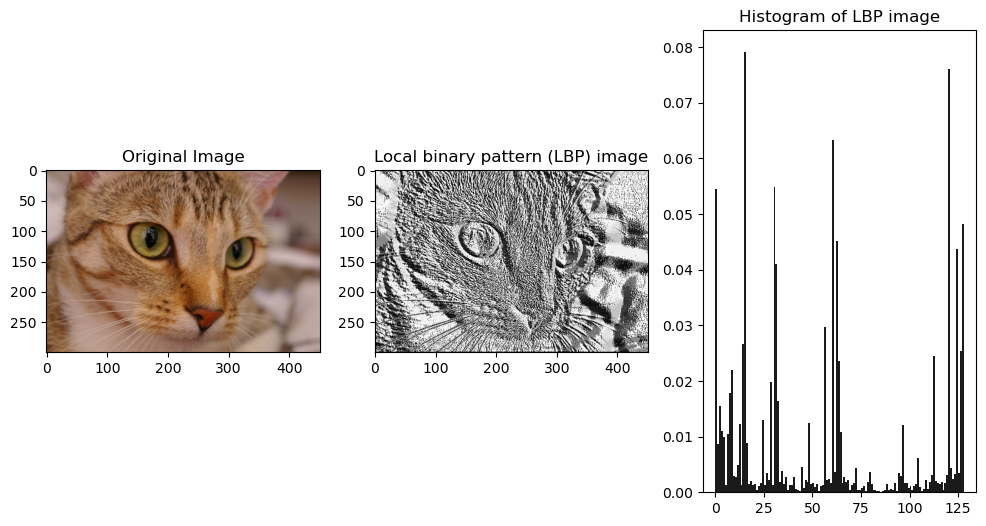

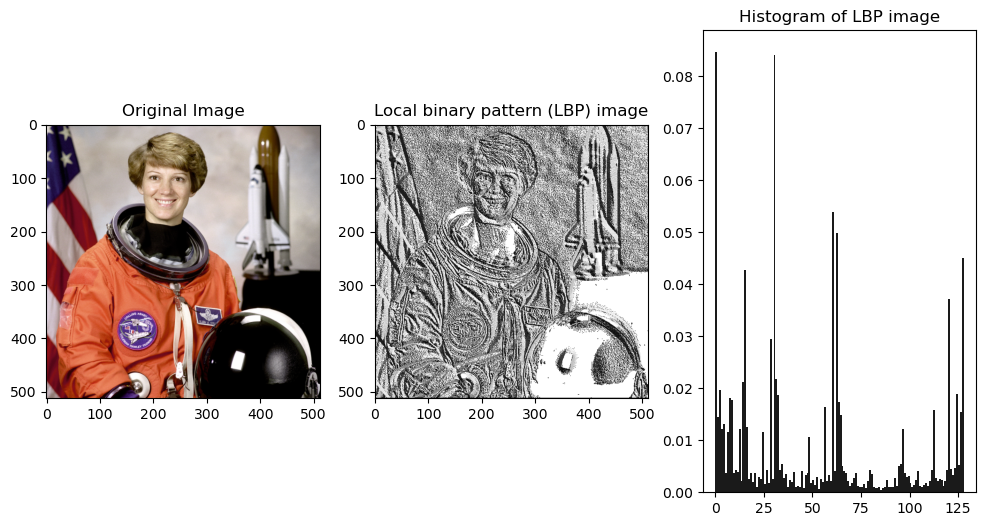

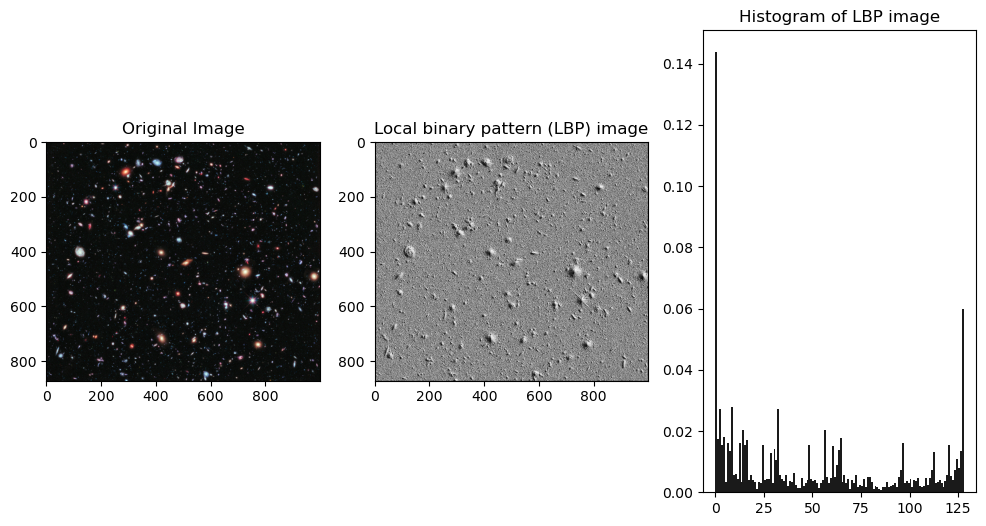

In [51]:
# local Binary Patterns
def get_pixel(img, center, x, y):
    new_value = 0
      
    try:
        # If local neighbourhood pixel value is greater than or equal
        # to center pixel values then set it to 1
        if img[x][y] >= center:
            new_value = 1      
    except:
        # Exception is required when neighbourhood value of a center
        # pixel value is null i.e. values present at boundaries.
        pass
      
    return new_value
   
# Function for calculating LBP
def lbp_calculated_pixel(img, x, y):
   
    center = img[x][y]
    val_ar = []
    val = 0.0

    # top_left
    val_ar.append(get_pixel(img, center, x-1, y-1))
      
    # top
    val_ar.append(get_pixel(img, center, x-1, y))
      
    # top_right
    val_ar.append(get_pixel(img, center, x-1, y + 1))
      
    # right
    val_ar.append(get_pixel(img, center, x, y + 1))
      
    # bottom_right
    val_ar.append(get_pixel(img, center, x + 1, y + 1))
      
    # bottom
    val_ar.append(get_pixel(img, center, x + 1, y))
      
    # bottom_left
    val_ar.append(get_pixel(img, center, x + 1, y-1))
      
    # left
    val_ar.append(get_pixel(img, center, x, y-1))
       
    # Convert binary values to decimal
    power_val = [1, 2, 4, 8, 16, 32, 64, 128]
   
    for i in range(len(val_ar)):
        val += val_ar[i] * power_val[i]
          
    return val

def histo_gram(ax, lbp):
    n_bins = int(lbp.max() + 1)
    return hist(
        lbp.ravel(), density=True, bins=n_bins, range=(0, n_bins), facecolor='0.5'
    )

images = [data.chelsea(), data.astronaut(), data.hubble_deep_field()]

for img in images:
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    height, width = img_gray.shape
    lbp_img = np.zeros((height, width), np.uint8)
    
    for i in range(0, height):
        for j in range(0, width):
            lbp_img[i, j] = lbp_calculated_pixel(img_gray, i, j)

    hist, bin = np.histogram(lbp_img.ravel(), 256, [0,255])
    #histo = histo_gram(lbp_img)
    # Plot the results
    fig, axes = plt.subplots(1, 3, figsize=(12, 6))

    # Plot original image
    axes[0].imshow(img)
    axes[0].set_title('Original Image')
    #axes[0].axis('off')

    # Plot LBP image
    axes[1].imshow(lbp_img, cmap='grey')
    axes[1].set_title('Local binary pattern (LBP) image')
    #axes[1].axis('off')

    # Plot histogram
    n_bins = int((lbp_img.max() + 1) / 2)
    axes[2].hist(
        lbp_img.ravel(), density=True, bins=n_bins, range=(0, n_bins), facecolor='0.1')
    axes[2].set_title('Histogram of LBP image')
    #axes[2].axis('off')

    plt.show()

**Plot the histogram and explain what it represents in terms of the texture features of the
image**

- TODO

**Compare the histograms of the LBP images**

- TODO

**Discuss differences in histograms and what they tell you about the textures of the different images**

- TODO